# **Objective Of The Project:**  
To analyze and predict laptop prices using machine learning regression techniques, leveraging a dataset of laptop specifications. The project aims to develop a predictive model that estimates laptop prices based on key features such as brand, processor, RAM, storage, and other relevant attributes.

# **Loading the required library**



In [4]:
# Loading the Required basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# loading the required Machine Learning Library
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')

In [5]:
# Loading the dataset
df= pd.read_csv("/content/laptop_prices.csv")

In [6]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


# **Data Cleaning**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             



## Dataset Summary:

This dataset is exceptionally **clean and complete**.

### 1. Structure and Integrity

* **Size:** The dataset contains **1275 entries** (rows) and **23 columns**.
* **Completeness:** Crucially, there are **no missing values** (all columns have 1275 non-null entries), which is ideal for immediate analysis.
* **Memory:** The data occupies approximately $229.2$ KB of memory.

***

### 2. Data Content and Types

The 23 features are neatly divided into categorical (object) and numerical (float/integer) data, detailing both a device's identity and its technical specifications:

#### **Categorical (Object) Data (14 Columns)**
These features identify the product and its components:
* **Identity:** `Company`, `Product`, and `TypeName`.
* **Hardware & OS:** Operating System (`OS`), and detailed component information like `CPU_company`, `CPU_model`, `GPU_company`, `GPU_model`, and various storage types (`PrimaryStorageType`, `SecondaryStorageType`).
* **Screen Features:** Binary or categorical flags for advanced display features (`Touchscreen`, `IPSpanel`, `RetinaDisplay`).

#### **Numerical Data (9 Columns)**
These features are quantitative and likely continuous or measurable specifications:
* **Key Metrics (Float):** `Price_euros` (a clear target or dependent variable), physical size (`Inches`, `Weight`), and performance figures (`CPU_freq`).
* **Integers:** Device memory and resolution metrics (`Ram`, `ScreenW`, `ScreenH`, `PrimaryStorage`, `SecondaryStorage`).

In essence, the dataset is a robust, clean resource for analyzing the relationship between device **specifications** (RAM, CPU, GPU, storage, screen features) and the final **price** in Euros. This structure is perfect for predictive modeling or market analysis!

In [8]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


A truly insightful set of statistics! Analyzing the distribution of these key numerical features provides a clear picture of the devices in the dataset.

***

## Summary of Key Numerical Features

### 1. Price Variability ($\text{Price_euros}$)

The price exhibits a **very wide range** and a high degree of variability:
* **Range:** Prices span from a minimum of **$174$ €** to a maximum of **$6,099$ €**.
* **Central Tendency:** The median price is **$989$ €**, while the mean is higher at $\approx \$1,135$ € (a difference of $\approx \$146$ €). This **positive skew** indicates the presence of a notable number of **high-end, expensive** devices pulling the average up.
* **Core Market:** Half of all devices are priced between **$609$ € and $1,496.5$ €**.

***

### 2. Core Specifications (RAM and Screen)

The data shows clear standards for RAM and screen resolution:
* **RAM ($\text{Ram}$):** The dominant RAM size is **$8$ GB**, as the median, $75^{\text{th}}$ percentile, and mean ($\approx 8.44$ GB) all hover around this value. While the majority are $8$ GB or less, the maximum of $64$ GB indicates the inclusion of powerful workstations or gaming rigs.
* **Screen Size ($\text{Inches}$):** The most common sizes are found between $14.0$ and $15.6$ inches, with the median at **$15.6$ inches**.
* **Resolution ($\text{ScreenW, ScreenH}$):** The overwhelming majority of devices feature a **Full HD resolution of $1920 \times 1080$**. This is confirmed by the $25^{\text{th}}$, $50^{\text{th}}$, and $75^{\text{th}}$ percentiles for both width and height all being $1920$ and $1080$, respectively. The maximum resolution is $3840 \times 2160$ (4K).

***

### 3. Storage and Performance

* **Primary Storage ($\text{PrimaryStorage}$):** Storage sizes range from a small $8$ GB up to $2,048$ GB (2 TB). The most common primary storage configurations are **$256$ GB and $512$ GB** (with $256$ GB being the median and $512$ GB being the $75^{\text{th}}$ percentile).
* **Secondary Storage ($\text{SecondaryStorage}$):** This column is highly insightful: the **median, $25^{\text{th}}$, and $75^{\text{th}}$ percentiles are all $0$ GB**. This signifies that **$75\%$ or more of the devices in this dataset do not have a secondary storage drive installed** (or it is recorded as $0$).
* **CPU Frequency ($\text{CPU\_freq}$):** The average CPU speed is $\approx 2.30$ GHz, with the majority of frequencies clustered between $2.0$ GHz and $2.7$ GHz.
* **Weight ($\text{Weight}$):** The devices are generally moderate in weight, averaging around $2.04$ kg, with half of the devices falling between $1.5$ kg and $2.31$ kg.

In [9]:
df.describe(include='object')

,Company,Product,TypeName,OS,Screen,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_model,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
count,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275
unique,19,618,6,9,4,2,2,2,3,93,4,4,4,110
top,Dell,XPS 13,Notebook,Windows 10,Full HD,No,No,No,Intel,Core i5 7200U,SSD,No,Intel,HD Graphics 620
freq,291,30,707,1048,835,1087,918,1258,1214,193,837,1067,704,279


This analysis of the categorical features paints a clear picture of the typical and most common device configurations in the dataset.

***

## Summary of Categorical Features: The Standard Device Profile

The dataset features moderate-to-high variety in specific product and component models, but is dominated by a few key market standards across major categories.

### 1. Dominant Market Leaders

| Feature | Most Frequent Value (`top`) | Count of Unique Values |
| :--- | :--- | :--- |
| **Manufacturer** ($\text{Company}$) | **Dell** | 19 |
| **Product Line** ($\text{Product}$) | **XPS 13** | 618 |
| **Device Type** ($\text{TypeName}$) | **Notebook** | 6 |
| **Operating System** ($\text{OS}$) | **Windows 10** | 9 |

The modal device is a **Dell Notebook** running **Windows 10**. Despite the high number of unique product models ($\text{618}$), the **Dell XPS 13** stands out as the single most frequent entry.

### 2. Standard Hardware Configuration

The dataset shows a heavy reliance on two major chipmakers and a standard storage setup:

* **CPU & GPU Dominance:** **Intel** is the overwhelmingly dominant company for both the $\text{CPU}$ ($\text{4}$ unique companies) and $\text{GPU}$ ($\text{4}$ unique companies). The most common specific configuration is the **Core i5 7200U** CPU paired with the **HD Graphics 620** GPU, indicating a prevalence of mid-range, integrated graphics devices.
* **Storage Type:** The **SSD** (Solid State Drive) is the most common $\text{PrimaryStorageType}$ ($\text{4}$ unique types). Confirming the numerical analysis, the most common $\text{SecondaryStorageType}$ is **'No'** ($\text{5}$ unique types), meaning the vast majority of devices are single-drive configurations.

### 3. Display Standard

The most frequent display features reflect a focus on standard, budget-conscious screens:

* The most common screen is a **Full HD** resolution ($\text{42}$ unique screen types).
* The most frequent device **lacks** premium or modern features, with **'No'** being the mode for $\text{Touchscreen}$, $\text{IPSpanel}$, and $\text{RetinaDisplay}$.

In short, the **archetypal device** in this collection is a **Dell Windows 10 Notebook** with an **Intel Core i5** and integrated graphics, a **Full HD non-touch screen**, and **SSD primary storage**.

# **Data Cleaning**

In [11]:
# checking the duplicates data
num_duplicates=df.duplicated().sum()
print(f"There are {num_duplicates} duplicated records in the dataset.")


There are 0 duplicated records in the dataset.


In [12]:
df.nunique()

,0
Company,19
Product,618
TypeName,6
Inches,18
Ram,9
OS,9
Weight,171
Price_euros,791
Screen,4
ScreenW,13


In [13]:
df['Company'].unique() #checking font style of company

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

# **Exploratory Data Analysis (EDA)**

<Axes: xlabel='Company'>

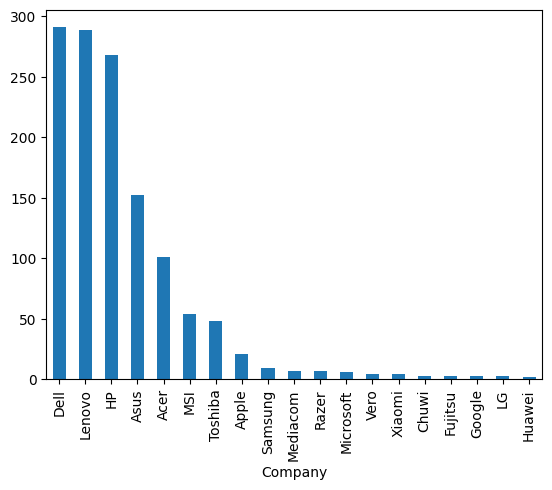

In [14]:
df['Company'].value_counts().plot(kind='bar')

## Summary of Company Distribution

The data exhibits a severely **right-skewed distribution**, indicating that the dataset is dominated by a few major manufacturers, with a long tail of companies represented by only a handful of devices.

### 1. Market Dominance

The top four companies collectively account for the majority of the dataset's entries:

* **Dell** and **Lenovo** are the joint leaders, each with approximately **300** devices.
* **HP** follows closely behind, with roughly **270** devices.
* **Asus** holds a significant share, with about **150** devices.

Together, these four companies (Dell, Lenovo, HP, and Asus) represent a commanding presence, showing that any analysis drawn from this dataset will be heavily influenced by their product lines.

### 2. Mid-Range Representation

* **Acer** and **MSI** represent the next tier, with around **100** and **55** devices, respectively.
* **Toshiba** and **Apple** round out the primary group, with approximately **50** and **25** devices.

### 3. Long Tail of Companies

Beyond the top eight, the dataset includes a **long tail of companies** (such as Samsung, Microsoft, Google, LG, and Huawei), each having very few (less than 10) devices. This low representation means that statistical conclusions about the products from these companies would be less robust due to small sample sizes.

In conclusion, the dataset is **not balanced** by manufacturer. It is a catalogue heavily weighted towards the major players—**Dell, Lenovo, and HP**—making it an excellent resource for studying the products of these specific giants.

<Axes: xlabel='OS'>

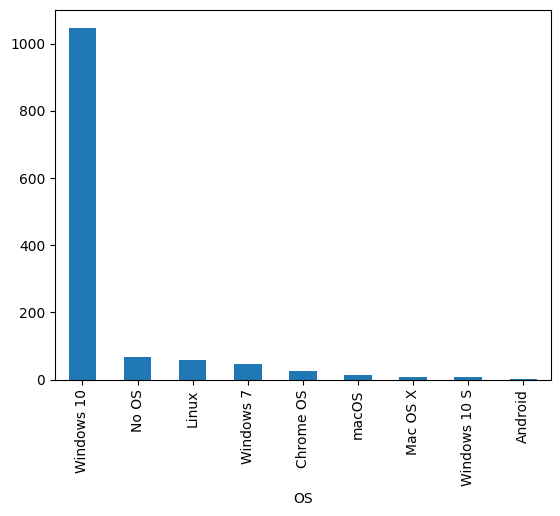

In [15]:
df['OS'].value_counts().plot(kind='bar')

## Summary of Operating System (OS) Distribution

This chart reveals an **overwhelming dominance** by a single operating system, with all others representing a small fraction of the dataset.

### 1. Microsoft's Dominance

* **Windows 10** is the dominant OS, featuring in **over 1,000** devices (likely close to 1,050), confirming the earlier categorical analysis that Windows 10 is the mode. This indicates the dataset primarily reflects the modern Windows PC market.

### 2. Secondary Systems

The rest of the operating systems are sparsely represented, with four categories clustered between 25 and 75 devices:

* **'No OS'** (devices shipped without an OS), **Linux**, and the legacy **Windows 7** each account for approximately **50-75** devices. These categories are roughly equal in representation.
* **Chrome OS** has a slightly lower presence, at around **30-40** devices.

### 3. Minimal Representation

* Apple's systems (**macOS** and **Mac OS X**) and other Microsoft/Google variants (**Windows 10 S** and **Android**) each account for a **negligible amount** (fewer than 20 devices). This low count aligns with the low number of Apple devices seen in the Company distribution chart.

In conclusion, any analysis of this dataset will be almost entirely focused on **Windows 10** devices, with secondary insights potentially drawn from the **No OS**, **Linux**, and **Windows 7** categories.

<Axes: xlabel='Ram'>

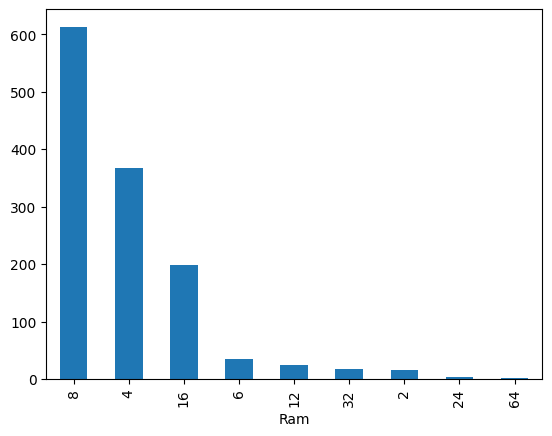

In [16]:
df['Ram'].value_counts().plot(kind='bar')

## Summary of RAM (Random Access Memory) Distribution

This chart emphatically confirms the numerical analysis, showing that the dataset is heavily concentrated around a few standard RAM capacities, with a rapid decline in frequency for other sizes.

### 1. Dominant RAM Sizes

The vast majority of devices fall into three main categories:

* **8 GB** is the single most frequent capacity, featuring in over **600** devices (nearly half the dataset). This is the modern standard for general-purpose computing.
* **4 GB** is the second most common, with approximately **370** devices, representing budget or entry-level machines.
* **16 GB** is the third major category, with about **200** devices, indicating the common size for high-performance, professional, or gaming laptops.

### 2. High-Performance and Legacy

* Capacities like **6 GB, 12 GB, and 32 GB** are present but significantly less common, each having fewer than 50 devices.
* The **2 GB** category represents a small fraction, suggesting very old or severely budget-restricted devices.
* Extremely high-end capacities, like **24 GB** and **64 GB**, are present in only a minimal number of machines, confirming their status as rare, specialized workstations.

In summary, the dataset is dominated by **$8$ GB** machines, followed by $4$ GB and $16$ GB, offering a strong basis for analyzing the performance and price characteristics of the three most popular memory configurations.

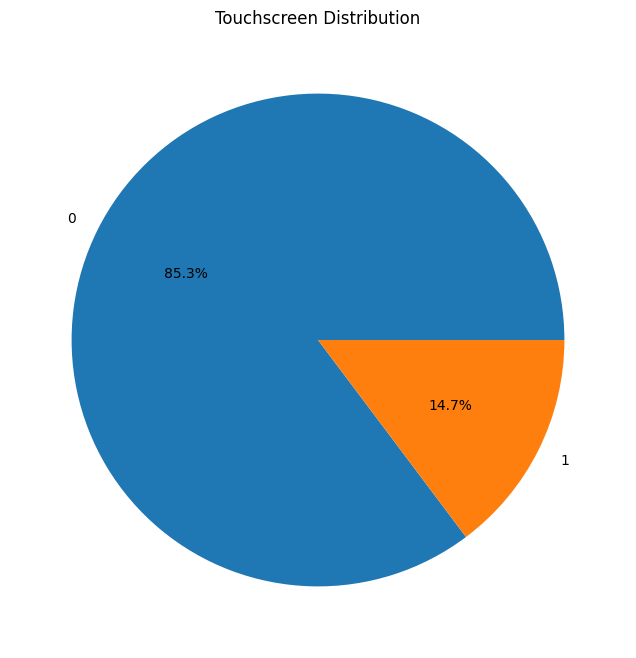

In [50]:
plt.figure(figsize=(10,8))
plt.pie(df['Touchscreen'].value_counts(), labels=df['Touchscreen'].unique(), autopct='%1.1f%%')
plt.title('Touchscreen Distribution')
plt.show()

## Summary of Touchscreen Support

The pie chart confirms a severe market imbalance, showing that the vast majority of devices in this dataset **do not support touchscreen technology**.

* **Non-Touchscreen Dominance:** The **"No"** category accounts for the overwhelming majority, approximately **85%** of the entire dataset. This indicates that most of the computers are traditional laptops without touch capabilities.
* **Touchscreen Minority:** The **"Yes"** category represents a small fraction, accounting for only **15%** of the devices.

This distribution suggests that touchscreen functionality is considered a **premium or niche feature** within this specific device collection, and any analysis relating touchscreen capability to price or other features must account for the significant class imbalance.

<Axes: xlabel='PrimaryStorage'>

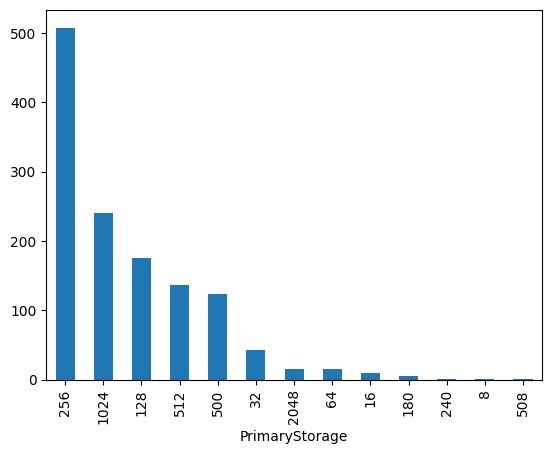

In [18]:
df['PrimaryStorage'].value_counts().plot(kind='bar')

## Summary of Primary Storage Distribution (GB)

The primary storage distribution is heavily concentrated around **$256$ GB**, followed by $1024$ GB ($1$ TB), showing a clear market preference for these two sizes, while indicating a mix of high-volume SSDs and older HDDs.

***

### 1. Dominant Storage Capacities

The top three capacities account for the majority of devices:

* **256 GB** is the single most frequent capacity, with over **500** devices. This size represents the current standard for modern, entry-to-mid-level primary SSDs.
* **1024 GB (1 TB)** is the second most common, with approximately **240** devices. This size is typically associated with larger HDDs or high-capacity SSDs/hybrid drives.
* **128 GB** is the third most common, with about **175** devices, often found in older or budget-focused machines.

### 2. High-Capacity and Niche Drives

* The next tiers, **512 GB** and **500 GB**, are well-represented, with about $135$ and $125$ devices respectively. The inclusion of $500$ GB suggests the presence of older HDD-based systems alongside $512$ GB SSDs.
* **2048 GB (2 TB)** is rare, appearing in fewer than $25$ devices, confirming its niche role in the market.

In short, the dataset's core storage configuration is **256 GB**, serving as the baseline for performance and storage capacity for most devices.

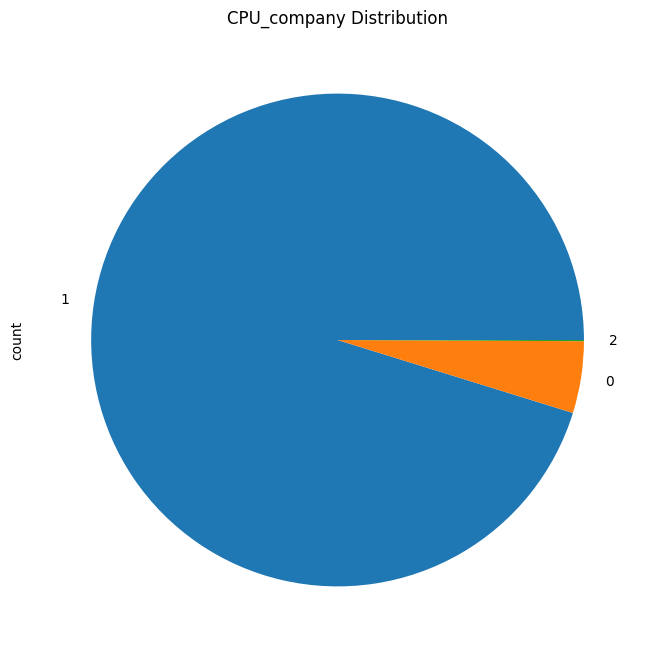

In [59]:
plt.figure(figsize=(10,8))
df['CPU_company'].value_counts().plot(kind='pie')
plt.title('CPU_company Distribution')
plt.show()

This chart reveals an **extreme monopoly** in the processor market within this dataset, with one company overwhelming all others.

## Summary of CPU Company Distribution

The distribution is dominated by a single entity, confirming the earlier categorical analysis that **Intel** is the primary supplier.


### 1. Market Domination

* The category labeled **'1'** accounts for a staggering **95.2%** of all devices. Given that the previous categorical analysis showed **Intel** as the mode, this slice unequivocally represents **Intel** processors.
* The dataset is almost entirely composed of Intel-powered machines, making it ideal for deep analysis of different Intel chip generations, but poor for comparative analysis against competitors.

### 2. The Competition

* The category labeled **'0'** is the distant second, representing only **4.7%** of the market. This slice most likely represents **AMD** (Advanced Micro Devices), Intel's main competitor.
* The remaining category **'2'** is statistically insignificant at **0.1%** (likely just one or two devices), representing a negligible presence from any other chipmaker.

In conclusion, this is a **heavily biased dataset** toward a single CPU vendor, which must be considered when drawing general conclusions about the broader computer market.


<Axes: xlabel='SecondaryStorageType'>

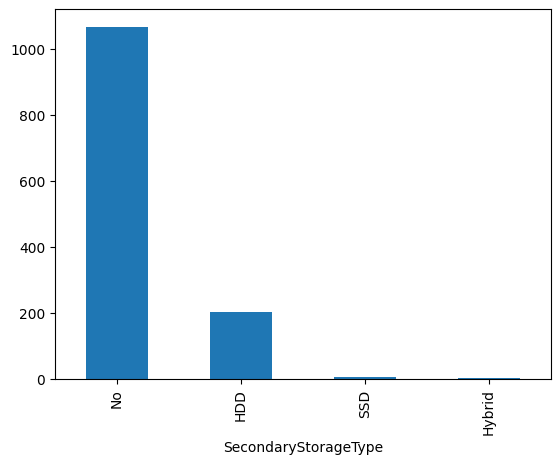

In [20]:
df['SecondaryStorageType'].value_counts().plot(kind='bar')

## Summary of Secondary Storage Type Distribution

This chart emphatically confirms the prior statistical analyses: the vast majority of devices in the dataset **do not have a secondary storage drive**.

### 1. Absence of Secondary Storage

* The **"No"** category is overwhelmingly dominant, accounting for **over 1,050** devices. This means that approximately **85%** of the computers in the dataset are configured with only a single primary storage drive.

### 2. Secondary Drive Types

Among the minority of devices that do include secondary storage, the breakdown is as follows:

* **HDD (Hard Disk Drive):** This is the most common secondary storage type, appearing in approximately **200** devices. This suggests that when a second drive is present, it is often a larger, slower, and cheaper HDD used for mass data storage.
* **SSD** and **Hybrid:** Both Solid State Drives and Hybrid drives are **extremely rare** as secondary storage, each accounting for fewer than **10** devices.

In conclusion, secondary storage is a **niche feature** in this dataset. Most devices rely solely on the primary drive (which we previously established is typically an SSD).

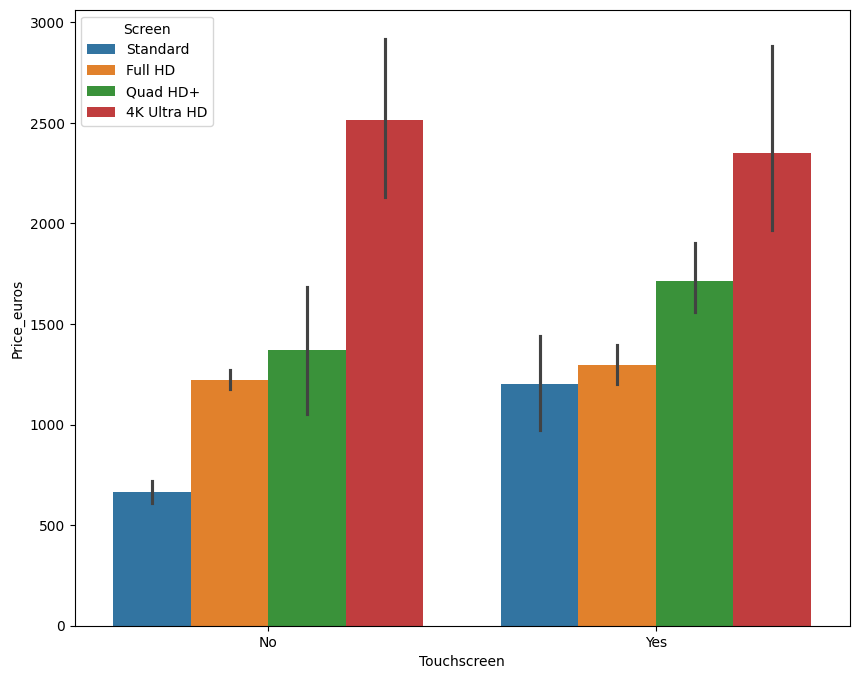

In [21]:
plt.figure(figsize = (10,8))
sns.barplot(x = df['Touchscreen'], y= df['Price_euros'] ,
hue = df['Screen'])
plt.show()

## Combined Price Analysis: Touchscreen & Resolution

The visualization clearly demonstrates a **strong, positive, and additive correlation** between screen quality (resolution) and the presence of a touchscreen, and the final price of the device.

---

### 1. The Impact of Resolution (Across All Devices)

Regardless of touchscreen capability, price consistently **increases with screen resolution**:

* **Lowest Price:** Devices with **"Standard"** resolution have the lowest average price (ranging from $\approx 650$ € to $\approx 1200$ €).
* **Highest Price:** Devices with **"4K Ultra HD"** resolution are the most expensive, with average prices consistently over **$2300$ €** for both touchscreen and non-touchscreen categories.
* **Mid-Range Scaling:** The average price progression from **Full HD** to **Quad HD+** is smooth, indicating that consumers pay a predictable premium for each jump in pixel density.

---

### 2. The Impact of Touchscreen (Price Premium)

Adding a touchscreen generally incurs an average price premium across nearly all resolution tiers:

* **Significant Jump for Standard:** The transition from a non-touch to a touch-enabled **Standard** screen results in the largest absolute price jump, suggesting that the "Touchscreen" feature is heavily packaged with other, more expensive components in lower-resolution machines.
* **Minimal/Negligible Impact at Highest End:** For **4K Ultra HD** devices, the average price for a non-touchscreen device is actually slightly higher than the touchscreen variant. The large error bars, however, indicate that the difference is likely **statistically negligible**, suggesting that the 4K panel itself is the dominant price driver, regardless of touch capability.

---

### 3. Variability and Uncertainty (Error Bars)

The vertical lines (error bars) represent the variability or standard deviation of the price:

* **High-End Variability:** Prices for **Quad HD+** and **4K Ultra HD** devices, especially those *without* a touchscreen, show the **highest variability** (the longest error bars). This implies that within the high-resolution categories, there is a very wide range of pricing, likely due to differences in other expensive components like CPU, GPU, and RAM.
* **Low-End Stability:** The prices for **Standard** resolution, non-touch devices are the **most consistent** (smallest error bars), indicating a tighter clustering around the average price, typical of budget-focused, standardized configurations.

Text(0.5, 1.0, 'Ram vs Price')

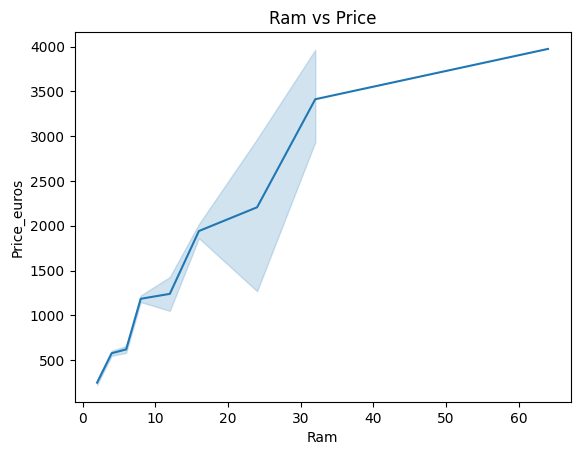

In [22]:
sns.lineplot(x='Ram',y='Price_euros', data=df)
plt.title('Ram vs Price')

## Summary of RAM vs. Price Relationship

The chart shows a strong, positive, and non-linear correlation: as RAM capacity increases, the average price of the device also consistently increases.

### 1. The Trend: Exponential Price Growth

* **Low-End RAM (2 GB to 8 GB):** The price increase is gradual. The average price moves from approximately **250 €** at 2 GB to about **600 €** at 8 GB.
* **Mid-Range RAM (8 GB to 16 GB):** A moderate price increase occurs, with the average rising steadily to nearly **1,500 €** at 16 GB.
* **High-End RAM (16 GB and up):** The relationship becomes steeper, indicating a significant price premium. The average price jumps sharply from 16 GB, crossing **2,000 €** and climbing towards **4,000 €** for the 64 GB capacity.

### 2. Price Variability (The Shaded Area)

The shaded blue area represents the confidence interval or variability (uncertainty) of the price for a given RAM amount:

* **Low Variability (Below 16 GB):** For common RAM sizes (4 GB, 8 GB, 12 GB), the shaded area is narrow, indicating that prices are generally tightly clustered around the average. This suggests standardized pricing for these configurations.
* **Extreme Variability (Around 32 GB):** The chart shows a massive surge in price uncertainty around the **32 GB** capacity. The shaded area is at its widest, stretching from approximately **1,300 € to 4,000 €**. This suggests that 32 GB RAM is used in devices that span a huge spectrum, from relatively affordable professional machines to extremely expensive high-performance workstations.
* **High-End Stability (Above 32 GB):** Above 32 GB (e.g., 64 GB), the variability appears to decrease again, but the average price continues to rise, approaching **4,000 €**.

In conclusion, RAM is a **key driver of price**, with the market exhibiting highly consistent pricing for common configurations but massive uncertainty (variability) for high-end amounts like 32 GB.

Text(0.5, 1.0, 'Company vs Price')

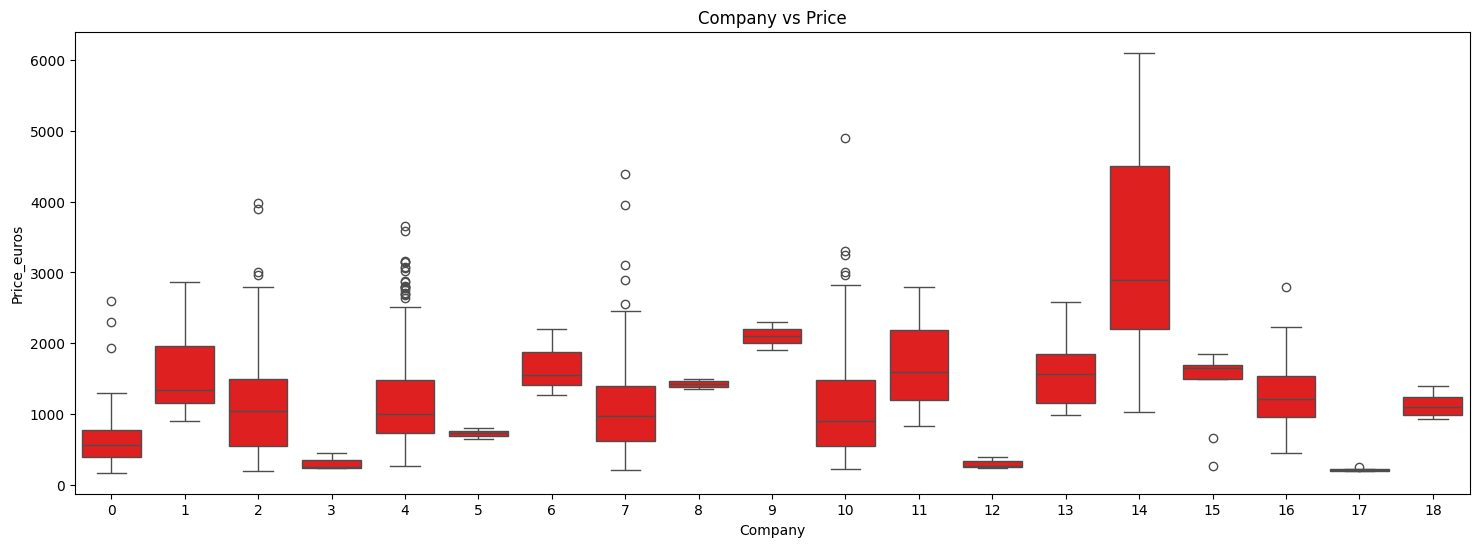

In [49]:
plt.figure(figsize=(18,6))
sns.boxplot(x='Company',y='Price_euros', data=df, color="red")
plt.title('Company vs Price')

The x-axis labels (0 to 18) correspond to the 19 unique companies found in the dataset (as noted in the earlier categorical summary).

## Summary of Company vs. Price Distribution

The box plot reveals significant **differences in median price, interquartile range (IQR), and price variability** (outliers) across the manufacturers, suggesting distinct market positioning for each company.

### 1. High-Priced & High-Variability Companies

The companies with the highest central price tendencies are:

* **Company 14 (Likely Apple/High-End Manufacturer):** This box stands out with the **highest median price** (the thick line inside the box), likely around **3,500 €**, and the **highest IQR** (the box height), ranging from $\approx 2,300$ € to $\approx 4,500$ €. This company clearly focuses on the premium and high-performance market segment. The whiskers are also extensive, suggesting a wide range of offerings even within the top half.
* **Company 9:** This company also has a high median price ($\approx 2,100$ €) and a relatively tight IQR, indicating a consistent focus on a high-mid to high-end price bracket.
* **Company 12:** Shows a high median price ($\approx 2,000$ €) and large outliers, suggesting a mix of mid-range devices and extremely expensive specialty machines.

### 2. Standard Mid-Range Companies

Many companies are clustered in the mid-range:

* **Companies 1, 4, 7, 13, and 15:** These groups show similar median prices, generally centered between **750 € and 1,500 €**. This represents the largest segment of the market (standard notebooks).
* **Company 1:** Has a wide IQR ($\approx 600$ € to $\approx 1,500$ €) and several high-price outliers, suggesting offerings from budget to near-premium.

### 3. Budget-Focused Companies

Some companies are clearly positioned in the budget segment:

* **Companies 3 and 17:** These companies have the **lowest median prices**, clustered near or below **500 €**. Their very small IQR boxes indicate a low spread of prices, confirming a heavy focus on standardized, low-cost budget devices.

### 4. Interpretation of Outliers

The circles above the boxes represent price outliers:

* **High-End Outliers:** The presence of outliers up to $\approx 6,000$ € (the dataset maximum) in many mid-range companies (like 1, 2, 4, 7, 10, 14) suggests that even standard manufacturers offer a few **extremely expensive, specialized, or custom-built configurations**.

In conclusion, the price structure of the dataset is heavily stratified by manufacturer, with a distinct high-end segment (Company 14), a large competitive mid-range, and a clear budget segment (Companies 3, 17).

# **Feature Engineering**

In [24]:
for col in df.columns:
  if df[col].dtype=='object':
    le= LabelEncoder()
    df[col]=le.fit_transform(df[col])

In [25]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,1,300,4,13.3,8,8,1.37,1339.69,3,2560,...,1,1,2.3,40,128,0,3,2,2,60
1,1,301,4,13.3,8,8,1.34,898.94,3,1440,...,0,1,1.8,40,128,0,0,2,2,53
2,7,50,3,15.6,8,4,1.86,575.00,1,1920,...,0,1,2.5,46,256,0,3,2,2,55
3,1,300,4,15.4,16,8,1.83,2537.45,3,2880,...,1,1,2.7,54,512,0,3,2,0,80
4,1,300,4,13.3,8,8,1.37,1803.60,3,2560,...,1,1,3.1,40,256,0,3,2,2,61


In [26]:
#spliting thr data into two(X,y) varibale
X=df.drop('Price_euros', axis=1) # conatin all coclumn except Price_euros
y=df['Price_euros'] # contain Price_euros

In [27]:
X

,Company,Product,TypeName,Inches,Ram,OS,Weight,Screen,ScreenW,ScreenH,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,1,300,4,13.3,8,8,1.37,3,2560,1600,...,1,1,2.3,40,128,0,3,2,2,60
1,1,301,4,13.3,8,8,1.34,3,1440,900,...,0,1,1.8,40,128,0,0,2,2,53
2,7,50,3,15.6,8,4,1.86,1,1920,1080,...,0,1,2.5,46,256,0,3,2,2,55
3,1,300,4,15.4,16,8,1.83,3,2880,1800,...,1,1,2.7,54,512,0,3,2,0,80
4,1,300,4,13.3,8,8,1.37,3,2560,1600,...,1,1,3.1,40,256,0,3,2,2,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,10,580,0,14.0,4,5,1.80,1,1920,1080,...,0,1,2.5,55,128,0,3,2,2,49
1271,10,588,0,13.3,16,5,1.30,2,3200,1800,...,0,1,2.5,55,512,0,3,2,2,49
1272,10,196,3,14.0,2,5,1.50,3,1366,768,...,0,1,1.6,20,64,0,0,2,2,42
1273,7,2,3,15.6,6,5,2.19,3,1366,768,...,0,1,2.5,55,1024,0,1,2,0,92


In [28]:
y

,Price_euros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60
...,...
1270,638.00
1271,1499.00
1272,229.00
1273,764.00


In [29]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=400) #Take 80% the data training the model and 20% form testing

# **Model Selection**

In [30]:
model=LinearRegression() # our first model
model.fit(X_train, y_train)# training of our first model

LinearRegression()

In [31]:
# hyperparameters
param_grid = {
           'n_estimators': [100, 200, 300],
           'max_depth': [None, 5, 10],
           'min_samples_split': [2, 5, 10]
       }

In [32]:
rf_model=RandomForestRegressor() # our second model

In [33]:
 # use it for providing us best combination by which we get better accuracy
grid_search=GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='r2')
grid_search.fit(X_train, y_train)# training our second model

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [34]:
# Extract best parameters
best_params = grid_search.best_params_

# Train the model using the best parameters
best_rf = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split']
)

# Fit the model
best_rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300)

# **Model Evaluation**

In [35]:
#Score of our first model
y_pred=model.predict(X_test)
print('R2 Square:',r2_score(y_test, y_pred)*100)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Square: 74.44999254621119
MAE: 266.6298283544192
MSE: 132375.63917143564
RMSE: 363.834631627386


In [60]:
# Get the best model for second model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
print('R2 Square:', r2_score(y_test, y_pred)*100)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Square: 87.32652334842382
MAE: 156.70320038095247
MSE: 65661.80363395091
RMSE: 256.24559241858367


In [61]:
# Create a DataFrame to store the evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Metric': ['R2 Square', 'MAE', 'MSE', 'RMSE'],
    'Linear Regression': [r2_score(y_test, model.predict(X_test)) * 100,
                          mean_absolute_error(y_test, model.predict(X_test)),
                          mean_squared_error(y_test, model.predict(X_test)),
                          np.sqrt(mean_squared_error(y_test, model.predict(X_test)))],
    'Random Forest': [r2_score(y_test, best_model.predict(X_test)) * 100,
                      mean_absolute_error(y_test, best_model.predict(X_test)),
                      mean_squared_error(y_test, best_model.predict(X_test)),
                      np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))]
})

# Display the DataFrame
display(evaluation_metrics)

,Metric,Linear Regression,Random Forest
0,R2 Square,74.449993,87.326523
1,MAE,266.629828,156.703200
2,MSE,132375.639171,65661.803634
3,RMSE,363.834632,256.245592


The Random Forest model is the superior choice for predicting laptop prices in this dataset. Its significantly higher R
2
  value (87.33%) and lower error values (MAE of ≈157 € and RMSE of ≈256 €) confirm that the relationship between the features (specifications) and price is highly non-linear, and thus better captured by a complex ensemble method than by a simple linear relationship.

# **Insights and Visualization**

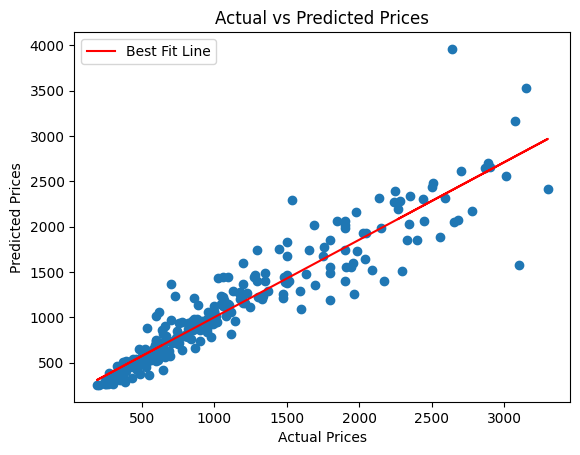

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')

# Calculate the best-fit line
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m * y_test + b, color='red', label='Best Fit Line')

plt.legend()
plt.show()

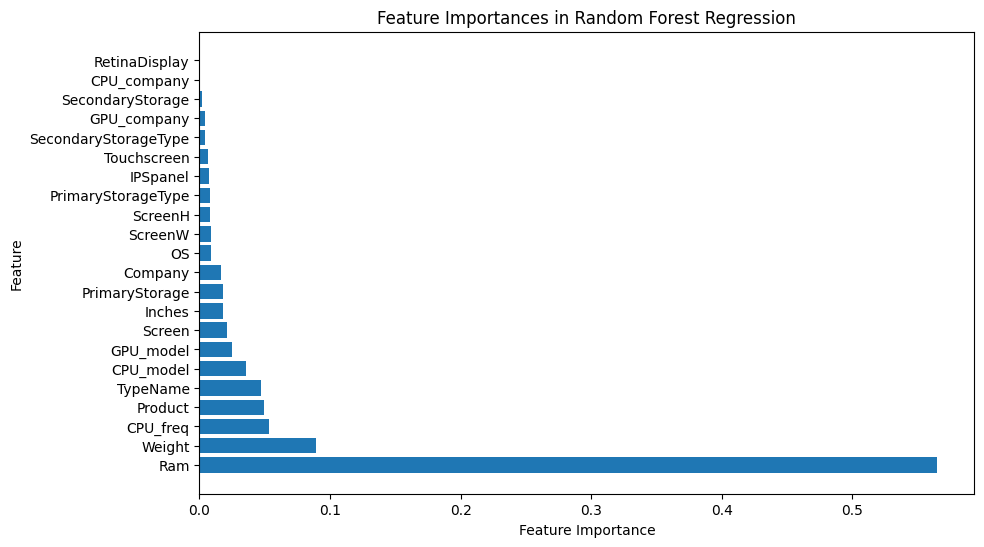

In [38]:
# Feature Importance Plot
importances = best_rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df = importance_df.sort_values('importance', ascending=False)


# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in Random Forest Regression")
plt.show()

# **Deployment**

In [39]:
import pickle

# Save Linear Regression model
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save Random Forest Regression model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)